In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
N_list = [8, 16, 32, 64, 80,100, 105, 110, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
print(N_list)
epoch_list = [20000]
seed_list = np.arange(1234, 1242)
epochs = epoch_list[0]


df = pd.DataFrame(columns = ['train', 'test', 'metrics', 'times'])
df_summary = pd.DataFrame(columns = ['err', 'texec'])
precision_list = []

for N in N_list:
    precision_list.append(N / 8)
    for seed in seed_list:
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(N) + '_epochs' + str(epochs) + '_size1'
        my_dict = np.load(name + '.npy', allow_pickle = True)

        texec = my_dict.item().get('texec')
        err = my_dict.item().get('err')
        train = my_dict.item().get('train')
        test = my_dict.item().get('test')
        metrics = my_dict.item().get('metrics')
        times = my_dict.item().get('times')
        pointsec = my_dict.item().get('pointsec')

        n = times.shape[0]

        df1 = pd.DataFrame({
                'N': n * [N],
                'seed': n * [seed],
                'train': train,
                'test': test,
                'metrics': metrics,
                'times': times,
                'iteration' : np.arange(n) * 500,
                'pointsec': pointsec
            })
        
        df2 = pd.DataFrame({
            'N': [N],
            'seed': [seed],
            'err': [err],
            'texec': [texec]
        })
        
        df = pd.concat([df, df1])
        df_summary = pd.concat([df2, df_summary])
        
        
df = df.reset_index(drop=True)
df_summary = df_summary.reset_index(drop=True)
    
df['N'] = df['N'].astype(int).astype("category")
df['seed'] = df['seed'].astype("category")
df_summary['N'] = df_summary['N'].astype(int).astype("category")
df_summary['seed'] = df_summary['seed'].astype("category")

[8, 16, 32, 64, 80, 100, 105, 110, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


In [3]:
rgb = [(236, 0, 84), (254, 64, 18), (38, 174, 65), (44, 95, 177)]
rgb = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in rgb]
cmap = sns.blend_palette(rgb, n_colors=4)

pink = rgb[0]
orange = rgb[1]
green = rgb[2]
blue = rgb[3]

In [4]:
colors = [pink, pink, pink,
          blue, blue, blue, blue,blue,blue,
         green, green, green, green, green, green, green, green, green]#, green, green]
my_palette = sns.palettes.color_palette(colors)
my_palette


[(0.9254901960784314, 0.0, 0.32941176470588235),
 (0.9254901960784314, 0.0, 0.32941176470588235),
 (0.9254901960784314, 0.0, 0.32941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137)]

In [5]:
cmap

[(0.9254901960784314, 0.0, 0.32941176470588235),
 (0.996078431372549, 0.25098039215686274, 0.07058823529411767),
 (0.14901960784313728, 0.6823529411764706, 0.2549019607843137),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235)]

/tmp/ipykernel_12891/270893770.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=df, x = 'iteration', y = 'metrics',kind = 'line', col ='N', legend=False, col_wrap=6,palette = cmap)


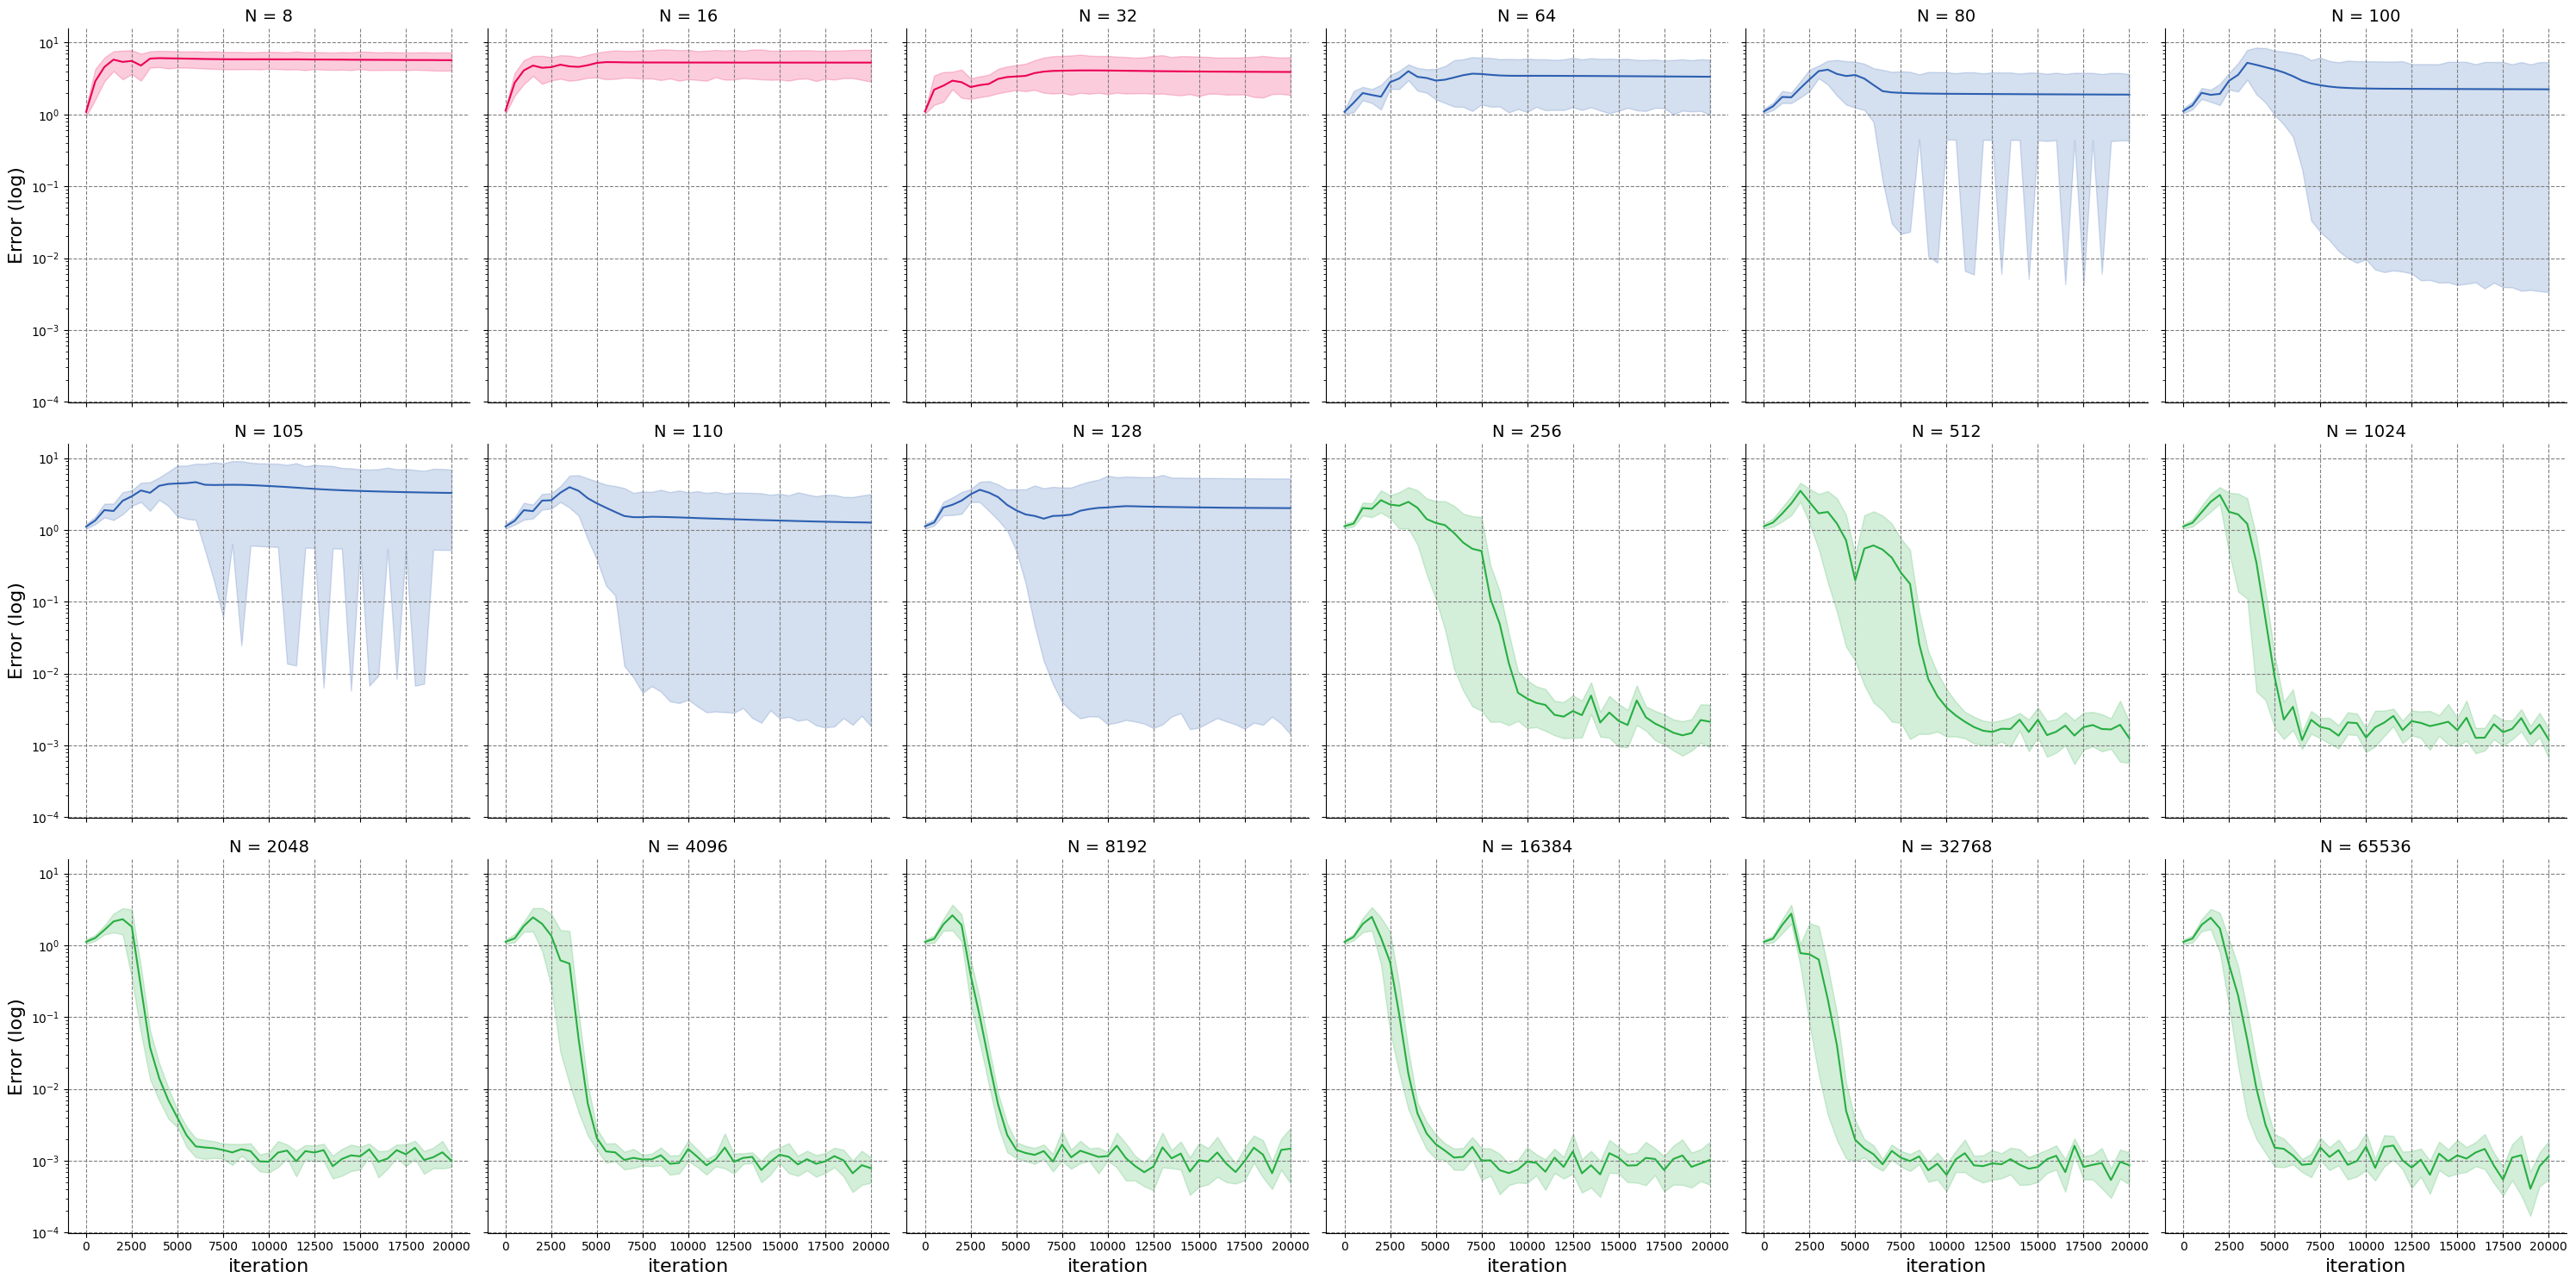

In [6]:
g = sns.relplot(data=df, x = 'iteration', y = 'metrics',kind = 'line', col ='N', legend=False, col_wrap=6,palette = cmap)
g.set(yscale="log")

plt.grid(color='gray', linestyle='dashed')  #just add this

i = 0
for ax in g.axes.flatten():
    ax.grid(color='gray', linestyle='dashed')
    coll = ax.collections[0]
    coll.set_color(my_palette[i])
    
    line = ax.get_lines()[0]
    line.set_color(my_palette[i])
    ax.set_xlabel('iteration', fontsize=16)
    ax.set_ylabel('Error (log)', fontsize=16)
    title = ax.get_title()
    ax.set_title(title, fontsize=14)
    i += 1
    
plt.tight_layout()
plt.savefig('plots/convergenceLaplace.pdf')    

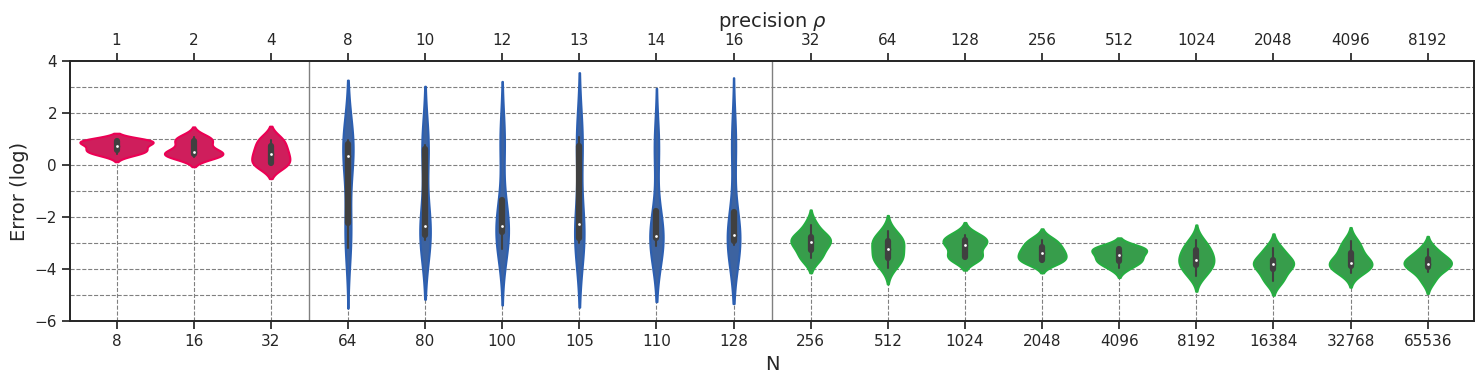

In [7]:
#sns.set_style("whitegrid")
df_summary['err_log'] = np.log10(df_summary['err'])
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!
g = sns.violinplot(data=df_summary, x = 'N', y = 'err_log', palette=my_palette, ax=ax, width=-.95)
#ax.grid(color='gray', linestyle='dashed')
#g.set(yscale="log")
#ax.set_facecolor('white') 
ax.set_xlabel(r'N', fontsize=14)
ax.set_ylabel(r'Error (log)', fontsize=14)

ax.axhline(0, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(2, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(3, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-2, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-3, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-4, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-5, linestyle='--', color='grey',lw=0.8, zorder=-1)



ax.axvline(2.5, linestyle='-', color='grey',lw=1, zorder=-1)
ax.axvline(8.5, linestyle='-', color='grey',lw=1, zorder=-1)

#plt.grid(axis='x')

# vertical plots
plt.plot([0,0], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([1,1], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([2,2], [-6,1],color='grey',linestyle='--', lw=0.8,zorder=-1)

for i in range(3, 18):
    plt.plot([i,i], [-6,-3],color='grey',linestyle='--', lw=0.8,zorder=-1)
    
plt.ylim(-6,4)
plt.xlim(-.6,17.6)
ax2 = ax.twiny()

new_tick_locations = np.arange(np.array(N_list).shape[0])
precision_list = np.array(precision_list)

def tick_function(X):    
    return ["%.0f" % z for z in X]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(precision_list))
ax2.set_xlabel(r"precision $\rho$", fontsize=14)


Nviolin = 18
for i in range(18):
    g.collections[2 * i].set_edgecolor(my_palette[i])
    
plt.tight_layout()
plt.savefig('plots/transientLaplacelr4.pdf')

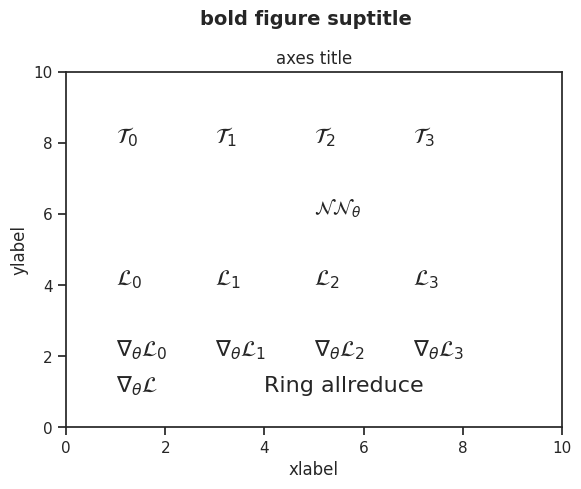

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fsize = 16

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(1,8,r'$\mathcal{T}_0$', fontsize=fsize)
ax.text(3,8,r'$\mathcal{T}_1$', fontsize=fsize)
ax.text(5,8,r'$\mathcal{T}_2$', fontsize=fsize)
ax.text(7,8,r'$\mathcal{T}_3$', fontsize=fsize)

ax.text(5,6,r'$\mathcal{N}\mathcal{N}_\theta$', fontsize=14)

ax.text(1,4,r'$\mathcal{L}_0$', fontsize=fsize)
ax.text(3,4,r'$\mathcal{L}_1$', fontsize=fsize)
ax.text(5,4,r'$\mathcal{L}_2$', fontsize=fsize)
ax.text(7,4,r'$\mathcal{L}_3$', fontsize=fsize)

ax.text(1,2,r'$\nabla_\theta\mathcal{L}_0$', fontsize=fsize)
ax.text(3,2,r'$\nabla_\theta\mathcal{L}_1$', fontsize=fsize)
ax.text(5,2,r'$\nabla_\theta\mathcal{L}_2$', fontsize=fsize)
ax.text(7,2,r'$\nabla_\theta\mathcal{L}_3$', fontsize=fsize)


ax.text(1,1,r'$\nabla_\theta\mathcal{L}$', fontsize=fsize)

ax.text(4,1,r'Ring allreduce', fontsize=fsize)
#plt.show()

plt.savefig('plots/export-symbols.svg')


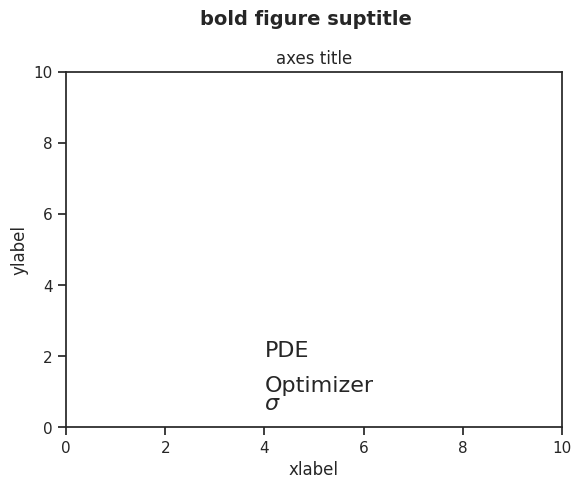

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

fsize = 16

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(4,1,r'Optimizer', fontsize=fsize)
ax.text(4,2,r'PDE', fontsize=fsize)
ax.text(4,0.5,r'$\sigma$', fontsize=fsize)


plt.savefig('plots/export-symbols.svg')